## Imports and Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
%reload_ext autoreload
%autoreload 2

df = pd.read_csv('./data/pokemon_data.csv')

## Setting Color Formatting

In [6]:
colors= {
    'Bug':'olivedrab',
    'Dark':'black',
    'Dragon':'orange',
    'Electric':'cyan',
    'Fairy':'hotpink',
    'Fighting':'gold',
    'Fire':'red',
    'Flying':'skyblue',
    'Ghost':'mediumpurple',
    'Grass':'green',
    'Ground':'sienna',
    'Ice':'dodgerblue',
    'Normal':'tan',
    'Poison': 'greenyellow',
    'Psychic':'blueviolet',
    'Rock': 'darkgrey',
    'Steel': 'silver',
    'Water': 'darkcyan'
}


## Basic Plot 

Text(0, 0.5, 'Defense')

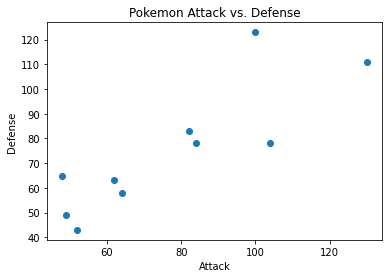

In [7]:
x=df['Attack'].head(10)
y=df['Defense'].head(10)
plt.scatter(x,y)
plt.title('Pokemon Attack vs. Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')

## Print Multiple Plots

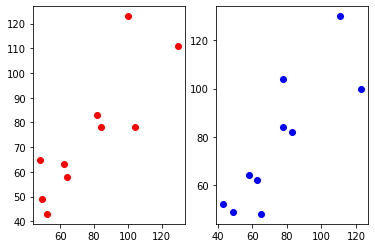

In [8]:
plt.subplot(1,2,1)
plt.scatter(x,y, color='red')
plt.subplot(1,2,2)
plt.scatter(y,x, color='blue')

## Figure Objects

Figures are objects that house multiple different graphics in one. Each graphic is known as a "axes" which frankly is terrible terminology, but is the standard.

Text(120, 0, 'Message')

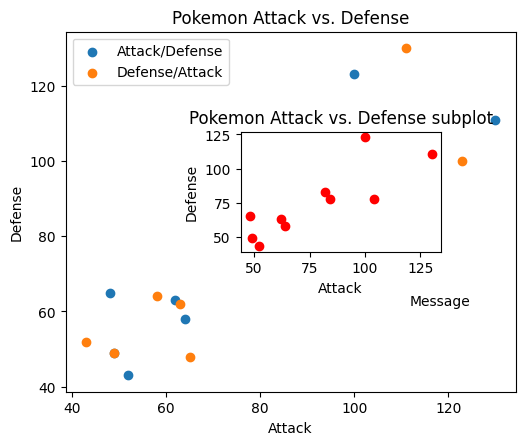

In [9]:
fig_1 = plt.figure(figsize=(5,4), dpi=100)
# The axes args represent (width margin, height margin, w, h)
# These arg values are percentages
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
#Setting Labels for axes
axes_1.set_xlabel('Attack')
axes_1.set_ylabel('Defense')
axes_1.set_title('Pokemon Attack vs. Defense')

#plotting multiple graphs in on chart
axes_1.scatter(x,y, label='Attack/Defense')
axes_1.scatter(y,x, label='Defense/Attack')

#Adding legend; (loc=0) auto places the legend 
axes_1.legend(loc=0)

# Adding a subplot within a plot
axes_2 = fig_1.add_axes([0.45, 0.45, .4, .3])

axes_2.set_xlabel('Attack')
axes_2.set_ylabel('Defense')
axes_2.set_title('Pokemon Attack vs. Defense subplot')
axes_2.scatter(x,y, color='red')

# Adding text to the chart for general labels, (0,0) is center
axes_2.text(120,0, 'Message')

## Subplots

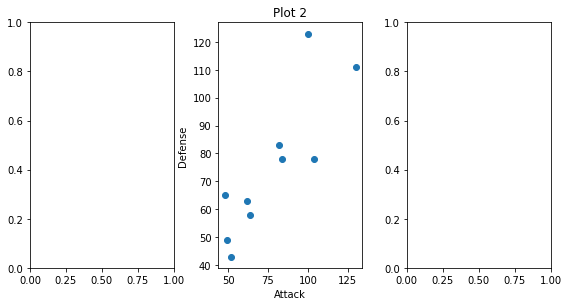

In [10]:
fig_2, axes_2 = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
#adding space between them
plt.tight_layout()

# Can index ref each column
axes_2[1].set_title('Plot 2')
axes_2[1].set_xlabel('Attack')
axes_2[1].set_ylabel('Defense')
axes_2[1].scatter(x,y)

## Appearance Options 

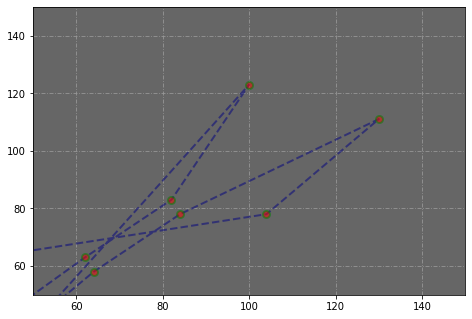

In [11]:
# Can reference colors by name or Hex values 

fig_3 = plt.figure(figsize=(6,4))
axes_3=fig_3.add_axes([0,0,1,1])
axes_3.plot(x,y, 
            color='navy', 
            alpha=.5, 
            lw=2, 
            ls='--', 
            marker='o',
            markersize=7,
            markerfacecolor='red',
            markeredgecolor='green',
            markeredgewidth=2
           )

#setting axis bounds
axes_3.set_xlim([50,150])
axes_3.set_ylim([50,150])

#adding grids (points, number of dashes, spacing of dashes)
axes_3.grid(True, color = '.6', dashes=(5, 2, 1,2))
axes_3.set_facecolor('.4')

## Saving figures

In [20]:
fig_3.savefig('./img/3rd_plot.png')

## Working with Pandas DF

Text(200, 50, 'Diminishing return')

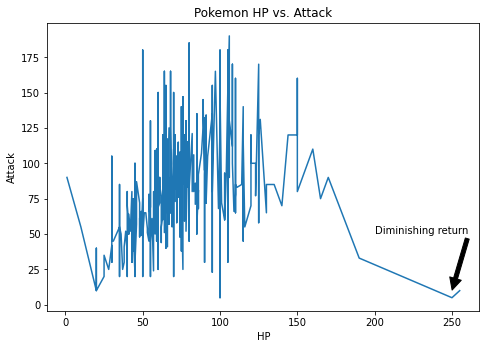

In [13]:
hp_defense= df[['HP','Attack']]
hp_defense=hp_defense.sort_values('HP')

#Pushing to a numpy array
np_arr=hp_defense.values
x_2=np_arr[:,0]
y_2=np_arr[:,1]


fig_4=plt.figure(figsize=(6,4))
axes_4 = fig_4.add_axes([0,0,1,1])
axes_4.set_xlabel('HP')
axes_4.set_ylabel('Attack')
axes_4.set_title('Pokemon HP vs. Attack')
axes_4.plot(x_2,y_2)

# annotating a data point
axes_4.annotate('Diminishing return', 
                xy=(250,10), 
                xytext=(200, 50), # (0,0 is left hand bottom corner)
                arrowprops=dict(facecolor='black', shrink=.01)
               )

#plt.bar(x_2,y_2)

## TeX Markup 

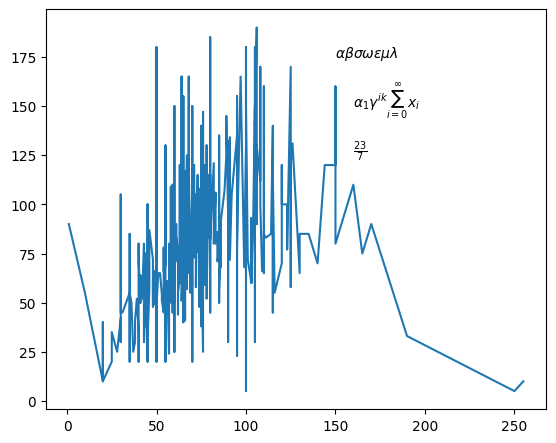

In [14]:
fig_5 = plt.figure(figsize=(5,4),dpi=100)
axes_5= fig_5.add_axes([0,0,1,1])

#adding LaTex for notation 
#greek characters
axes_5.text(150,175,
          r'$\alpha \beta \sigma \omega \epsilon \mu \lambda$')

#Summations
axes_5.text(160,150,
          r'$\alpha_1 \gamma^{ik} \sum_{i=0}^\infty x_i$')

#Fractions
axes_5.text(160,125,
          r'$\frac{23}{7}$')

axes_5.plot(x_2,y_2)

## Histograms

(array([0.00024606, 0.00073819, 0.00209154, 0.00812008, 0.01488681,
        0.01611713, 0.01783957, 0.01500984, 0.00824311, 0.0070128 ,
        0.00418307, 0.00098425, 0.00135335, 0.00024606, 0.00061516,
        0.00012303, 0.00024606, 0.        , 0.00012303, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00024606]),
 array([  1.  ,  11.16,  21.32,  31.48,  41.64,  51.8 ,  61.96,  72.12,
         82.28,  92.44, 102.6 , 112.76, 122.92, 133.08, 143.24, 153.4 ,
        163.56, 173.72, 183.88, 194.04, 204.2 , 214.36, 224.52, 234.68,
        244.84, 255.  ]),
 <BarContainer object of 25 artists>)

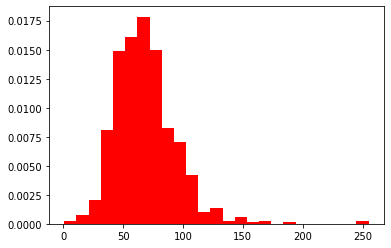

In [15]:
plt.hist(df['HP'],bins=25 ,density=True, stacked=True
        ,color= 'red')

# Can do a cumulative dist by cumulative=True
#histType='step' generates a line plot
# orienation='horizontal' or 'vertical'

## Barcharts

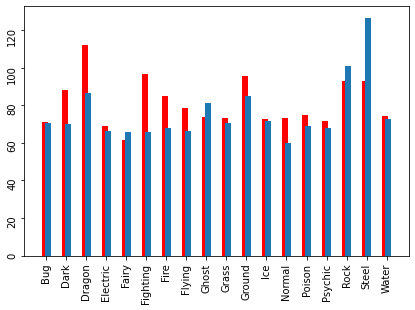

In [16]:
# simple way to rename column outputs for aggs, can still use lambda
type_averages= df.groupby('Type 1').agg(
    hp_mean=pd.NamedAgg(column='HP', aggfunc='mean'),
    hp_std=pd.NamedAgg(column='HP', aggfunc='std')
)

#plotting bar charts, yerr is used to add black bar of variance
#plt.bar(type_averages.index, type_averages['hp_mean'], yerr=type_averages['hp_std'])


type_comparison=df.groupby('Type 1').agg(
    attack_mean=pd.NamedAgg(column='Attack', aggfunc='mean'),
    defense_mean=pd.NamedAgg(column='Defense', aggfunc='mean')
)

# good convention to control for spacing between bars 
spc= np.arange(18)

# Plotting two bars side by side for comparison
plt.bar(spc, 
        type_comparison['attack_mean'], 
        width =.3,
        label='Attack Mean',
        color='red',
        align='edge')

plt.bar(spc+.3, 
        type_comparison['defense_mean'], 
        width =.3,
        label='Defense Mean',
        align='center')

# this func can help if formatting becomes cramped
plt.tight_layout()

#setting the tick marks and rotating 
plt.xticks(spc+.45/2, type_comparison.index)
plt.tick_params(rotation=90)


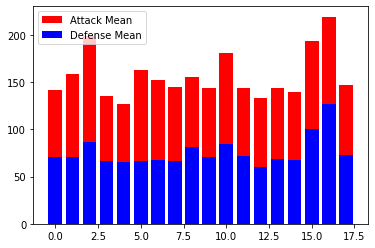

In [17]:
#stacked bar charts 

#np arrays seem to work a bit better for this 
#can repeat for the number of stacks that you would like
ind=np.arange(18)
attack_mean=np.array(type_comparison['attack_mean'])
defense_mean=np.array(type_comparison['defense_mean'])

# simply add the arrays for each value for whatever you want on top
plt.bar(ind, np.add(attack_mean, defense_mean), color='red', label='Attack Mean')
plt.bar(ind, defense_mean, color='blue', label='Defense Mean')

plt.legend(loc='upper left')


## Pie Charts

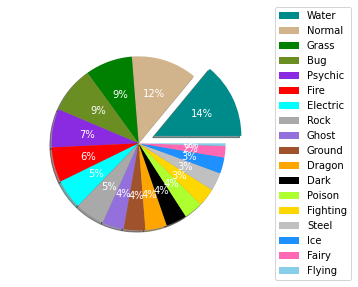

In [18]:
# can be used to randomly allocate colors for each type
#import random

type_breakdown=df.groupby('Type 1').agg(
    poke_num=pd.NamedAgg(column='HP', aggfunc='count')
)

type_breakdown=type_breakdown.sort_values('poke_num',
                                         ascending=False)

# placing the colors in the correct order
color_pie=[colors[_] for _ in type_breakdown.index]

# if you want to randomly allocate colors
#colors=[]
#for i in range(18):
#    rgb=(random.uniform(0,0.5),
#        random.uniform(0,0.5),
#        random.uniform(0,0.5))
#    colors.append(rgb)
    
# Establishes an array to determine which wedges are exploded
explode=[0] *18
explode[0]=0.2

wedges, texts,  autotexts = plt.pie(type_breakdown['poke_num'],
                                  explode=explode,
                                  labels=type_breakdown.index,
                                  colors=color_pie,
                                  autopct='%1.0f%%', # specifies 1 decimal place auto pct
                                  shadow=True, 
                                  textprops=dict(color='white'))

plt.legend(wedges, type_breakdown.index, loc='right',
          bbox_to_anchor=[1,0,0.5, 1])

## Time Series

In [19]:
import datetime as dt

#tesla stock price
#pulled from https://finance.yahoo.com/quote/TSLA/history?p=TSLA
tsla= pd.read_csv('TSLA.csv')
tsla_np= tsla.to_numpy()

#grabbing only closing price
tsla_close=tsla_np[-14:,4]

#setting up exclusions, obviously not grabbing all
holidays=[dt.datetime(2021, 1, 1),
         dt.datetime(2021,1,18)]

# freq establishes agg 'C' for business day
#'M' for month, 'W' for week
date_arr= pd.bdate_range(start='12/29/2020', end='1/19/2021',
                        freq='C', holidays=holidays)
date_arr_np=date_arr.to_numpy()

fig_7 = plt.figure(figsize=(8,5))
axes_7 = fig_7.add_axes([.1,.1,.9,.9])

axes_7.plot(date_arr_np, tsla_close)

FileNotFoundError: [Errno 2] No such file or directory: 'TSLA.csv'

## Scatterplots

In [ ]:
type_summary= df.groupby('Type 1').agg(
    mean_hp=pd.NamedAgg(column='HP', aggfunc='mean'),
    mean_attack=pd.NamedAgg(column='Attack', aggfunc='mean'),
    mean_defense=pd.NamedAgg(column='Defense', aggfunc='mean')
    )

# splitting in to arrays to allow for labelling
x_3=type_summary['mean_defense'].to_numpy()
y_3=type_summary['mean_attack'].to_numpy()
ind=type_summary.index.to_numpy()

#just in case colors got mixed 
color_summary=[colors[_] for _ in type_summary.index]

plt.title('Pokemon Type Summary of Mean Values')
plt.xlabel('Defense')
plt.ylabel('Attack')
plt.scatter(x_3,
            y_3,
           s=type_summary['mean_hp'], #used to define marker size
           c=color_summary,
           alpha=0.5)

#adding lables to each data point
for x,y,label in zip(x_3, y_3, ind):
    plt.annotate(label, (x,y))

plt.text(60,110,'Size of bubble: HP')
plt.tight_layout()



## Finance Charts

In [ ]:
import mplfinance as mpf

tsla= pd.read_csv('TSLA.csv', index_col =0, parse_dates=True)

tsla.index.name='Date'

#candlestick
#mpf.plot(tsla, type='candle')

#calcing a moving average and showing volume
mpf.plot(tsla, type='ohlc', mav=(3,5,7), volume=True)

# can also add args for show_nontrading=True

## Heat Maps

In [ ]:
type_granular=df.groupby(['Type 1', 'Type 2']).agg(
    mean_attack=pd.NamedAgg(column='Attack', aggfunc='mean')
)

type_pivot=pd.pivot_table(type_granular, values='mean_attack',
                         index='Type 1', columns='Type 2',
                         aggfunc='sum')

fig_10, axes_10 = plt.subplots()

im=axes_10.imshow(type_pivot, cmap='Wistia')

axes_10.set_xticks(np.arange(len(type_pivot.columns)))
axes_10.set_xticklabels(type_pivot.columns)

axes_10.set_yticks(np.arange(len(type_pivot.columns)))
axes_10.set_yticklabels(type_pivot.index)

#another way to rotate text
plt.setp(axes_10.get_xticklabels(),
         rotation=90, 
         ha='right',
         rotation_mode='anchor')

plt.xlabel('Type 2')
plt.ylabel('Type 1')
plt.title('Mean Attack by Pokemon Type 1 and Type 2')

plt.tight_layout()